In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [21]:
data = pd.read_csv('/content/traffic_data.csv',)

In [22]:
data.head()

,Title,Keyword,Keyword ID,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Trends,Last Seen,Keyword Difficulty
0,PMP® Exam & Certification | Flat 40% Off - Enr...,pmp certification,1,1,1,90500,3.76,4253,22.77,15991,24.66,0.60,166000000,"[67,54,81,81,67,67,81,67,81,81,67,67]",31-12-2024,78
1,PMP® Exam & Certification | Confidently Ace Th...,pmp certification,1,1,1,90500,3.76,4253,22.77,15991,24.66,0.60,172000000,"[67,54,81,81,67,67,81,67,81,81,67,67]",01-01-2025,78
2,PMP® Training & Exam | Special Offer: Get $400...,pmp certification,1,1,2,90500,3.82,1176,6.29,4492,6.92,0.65,154000000,"[54,81,81,67,67,81,67,81,81,67,67,81]",14-01-2025,77
3,CSM Scrum Master Course Online | Today's Offer...,scrum master certification,2,1,1,18100,3.21,850,4.55,2728,4.20,0.64,32000000,"[44,54,54,44,44,44,54,54,44,54,44,44]",10-01-2025,70
4,PMP® Certification | Ace PMP Exam in 1st Attempt,pmp certification,1,3,3,90500,3.82,814,4.35,3109,4.79,0.65,165000000,"[54,81,81,67,67,81,67,81,81,67,67,81]",07-01-2025,78


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               198 non-null    object 
 1   Keyword             198 non-null    object 
 2   Keyword ID          198 non-null    int64  
 3   Position            198 non-null    int64  
 4   Previous position   198 non-null    int64  
 5   Search Volume       198 non-null    int64  
 6   CPC                 198 non-null    float64
 7   Traffic             198 non-null    int64  
 8   Traffic (%)         198 non-null    float64
 9   Traffic Cost        198 non-null    int64  
 10  Traffic Cost (%)    198 non-null    float64
 11  Competition         198 non-null    float64
 12  Number of Results   198 non-null    int64  
 13  Trends              198 non-null    object 
 14  Last Seen           198 non-null    object 
 15  Keyword Difficulty  198 non-null    int64  
dtypes: float

In [24]:
data.describe()

,Keyword ID,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,1.980000e+02,198.000000
mean,5.297980,2.540404,2.398990,4735.151515,3.925101,94.292929,0.501414,327.444444,0.501869,0.382879,4.596240e+07,48.747475
std,4.773775,1.526711,1.560099,16040.125122,3.861980,447.803069,2.397821,1675.701037,2.584342,0.198383,1.465661e+08,16.954309
min,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000
25%,2.000000,1.000000,1.000000,70.000000,2.310000,0.250000,0.000000,0.000000,0.000000,0.190000,2.685000e+06,37.000000
50%,5.000000,2.000000,2.000000,170.000000,3.210000,3.000000,0.010000,7.500000,0.010000,0.410000,5.575000e+06,47.500000
75%,5.750000,4.000000,4.000000,1600.000000,4.492500,20.000000,0.100000,49.000000,0.070000,0.520000,3.180000e+07,60.000000
max,20.000000,6.000000,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,97.000000


In [25]:
data = data[['Search Volume', 'Keyword Difficulty']]

In [26]:
data.head()

,Search Volume,Keyword Difficulty
0,90500,78
1,90500,78
2,90500,77
3,18100,70
4,90500,78


In [27]:
X = data
y = data[["Keyword Difficulty"]]

Elbow Method

In [28]:
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


In [29]:
import plotly as py
import plotly.graph_objs as go

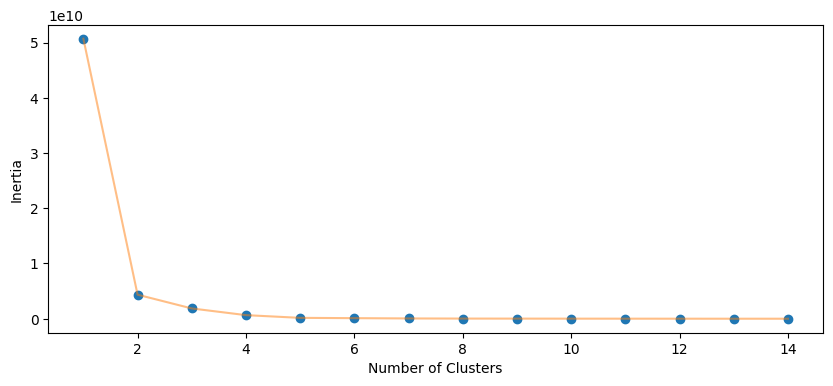

In [30]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [31]:
algorithm = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)

In [32]:
algorithm.fit(X)
y_kmeans = algorithm.labels_

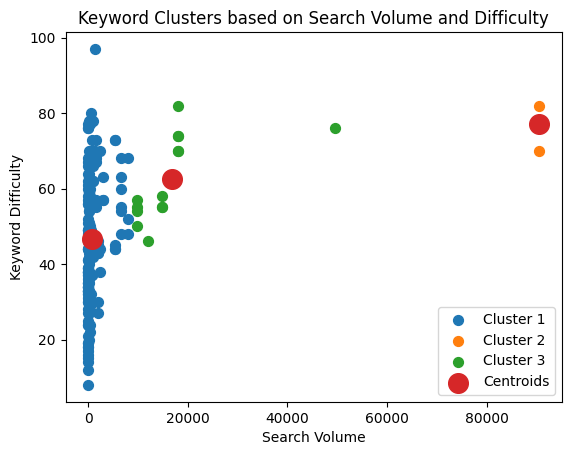

In [33]:
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=50, label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=50, label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=50, label='Cluster 3')

plt.scatter(algorithm.cluster_centers_[:,0], algorithm.cluster_centers_[:,1], s=200, label='Centroids')

plt.title('Keyword Clusters based on Search Volume and Difficulty')
plt.xlabel('Search Volume')
plt.ylabel('Keyword Difficulty')
plt.legend()
plt.show()